# Apply Decision Trees on `Donors Choose` dataset

<font color='green'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='blue'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='green'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='green'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:blue;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='blue'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Decision tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_polarity_scores(col):
    sid = SentimentIntensityAnalyzer()
    final_polarity = []
    for line in col:
        line_polarity_scores = []
        ss = sid.polarity_scores(line)
        line_polarity_scores.append(ss['neg'])
        line_polarity_scores.append(ss['neu'])
        line_polarity_scores.append(ss['pos'])
        line_polarity_scores.append(ss['compound'])
        final_polarity.append(line_polarity_scores)
    return final_polarity

### Importing all the required libraries

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

In [5]:
import re

import os
from tqdm import tqdm
import pickle

In [6]:
!pip install chart_studio

In [7]:
from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

In [8]:
!pip install wordcloud

## 1.1 Loading Data

In [9]:
import pandas
data = pandas.read_csv('preprocessed_data.csv', nrows = 50000)
print(data.shape)
column_names = data.columns
print(column_names)

(50000, 9)
Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')


In [10]:
essay_vals = data['essay'].values
f = np.vectorize(get_polarity_scores)

In [11]:
essay_pol_scores = get_polarity_scores(essay_vals)

In [12]:
polarity_df = pd.DataFrame(essay_pol_scores, columns=['neg','neu','pos','compound'])

In [13]:
final_data = data.join(polarity_df)
print(final_data.shape)
final_data.head(2)

(50000, 13)


school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price    neg    neu  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.013  0.783   
1  imagine 8 9 years old you third grade classroo...  213.03  0.072  0.680   

     pos  compound  
0  0.205    0.9867  
1  0.248    0.9897

In [14]:
new_column_names = final_data.columns
print(new_column_names)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')


In [15]:
final_data.value_counts('project_is_approved')

project_is_approved
1    41993
0     8007
dtype: int64

In [16]:
positive_df = final_data[final_data['project_is_approved'] == 1]
negative_df = final_data[final_data['project_is_approved'] == 0]

In [17]:
from sklearn.utils import resample
upsampled_negative = resample(negative_df, replace = True, n_samples = 41993, random_state = 42)

In [18]:
upsampled_data = pd.concat([positive_df, upsampled_negative])
upsampled_data.value_counts('project_is_approved')

project_is_approved
1    41993
0    41993
dtype: int64

In [19]:
y = upsampled_data['project_is_approved'].values
X = upsampled_data.drop(['project_is_approved'], axis = 1)
X.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     math_science   
1                                             4     specialneeds   

                  clean_subcategories  \
0  appliedsciences health_lifescience   
1                        specialneeds   

                                               essay   price    neg    neu  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.013  0.783   
1  imagine 8 9 years old you third grade classroo...  213.03  0.072  0.680   

     pos  compound  
0  0.205    0.9867  
1  0.248    0.9897

## 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

In [21]:
# Check the number of datapoints in each set after data splits
print("# of points in Train Dataset: ", X_train.shape, y_train.shape)
print("# of points in Test Dataset: ", X_test.shape, y_test.shape)

# of points in Train Dataset:  (56270, 12) (56270,)
# of points in Test Dataset:  (27716, 12) (27716,)


# <font color='green'><b> Task - 1 </b></font>

## 1.3 Make Data Model Ready: encoding numerical, categorical features

### 1.3.1 Encoding <i>CATEGORICAL</i> features <h4> Perform <i>ONE-HOT ENCODING</i> </h4>

#### 1.3.1.1 encoding categorical feature: `school_state`

In [22]:
vectorizer = CountVectorizer()
# vectorizer.fit(X_train['school_state'].values)    # ALWAYS fit on the train dataset only

# Use fit_transform on the train dataset directly
X_train_school_state_ohe = vectorizer.fit_transform(X_train['school_state'].values) 

# Use fitted CountVectorizer to convert text into vector 
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)
# X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)

print("After vectorization")
print()
print('Train_school_state shape: ', X_train_school_state_ohe.shape, y_train.shape)
print('Test_school_state shape: ', X_test_school_state_ohe.shape, y_test.shape)
# print('CV_school_state shape: ', X_cv_school_state_ohe.shape, y_cv.shape)

school_state_features = vectorizer.get_feature_names()
print()
print('school_state feature names: ', school_state_features)
print()
print('The total number of features:', len(school_state_features))

After vectorization

Train_school_state shape:  (56270, 51) (56270,)
Test_school_state shape:  (27716, 51) (27716,)

school_state feature names:  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']

The total number of features: 51


#### 1.3.1.2 encoding categorical feature: `teacher_prefix`

In [23]:
vectorizer = CountVectorizer()
# vectorizer.fit(X_train['teacher_prefix'].values)    # ALWAYS fit on the train dataset only

# Use fit_transform on the train dataset directly
X_train_teacher_prefix_ohe = vectorizer.fit_transform(X_train['teacher_prefix'].values) 

# Use fitted CountVectorizer to convert text into vector 
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
# X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)

print("After vectorization")
print()
print('Train_teacher_prefix shape: ', X_train_teacher_prefix_ohe.shape, y_train.shape)
print('Test_teacher_prefix shape: ', X_test_teacher_prefix_ohe.shape, y_test.shape)
# print('CV_teacher_prefix shape: ', X_cv_teacher_prefix_ohe.shape, y_cv.shape)

teacher_prefix_features = vectorizer.get_feature_names()
print()
print('teacher_prefix feature names: ', teacher_prefix_features)
print()
print('The total number of features:', len(teacher_prefix_features))

After vectorization

Train_teacher_prefix shape:  (56270, 5) (56270,)
Test_teacher_prefix shape:  (27716, 5) (27716,)

teacher_prefix feature names:  ['dr', 'mr', 'mrs', 'ms', 'teacher']

The total number of features: 5


#### 1.3.1.3 encoding categorical feature: `project_grade_category`

In [24]:
vectorizer = CountVectorizer()
# vectorizer.fit(X_train['project_grade_category'].values)    # ALWAYS fit on the train dataset only

# Use fit_transform on the train dataset directly
X_train_project_grade_category_ohe = vectorizer.fit_transform(X_train['project_grade_category'].values) 

# Use fitted CountVectorizer to convert text into vector 
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)
# X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)

print("After vectorization")
print()
print('Train_project_grade_category shape: ', X_train_project_grade_category_ohe.shape, y_train.shape)
print('Test_project_grade_category shape: ', X_test_project_grade_category_ohe.shape, y_test.shape)
# print('CV_project_grade_category shape: ', X_cv_project_grade_category_ohe.shape, y_cv.shape)

project_grade_category_features = vectorizer.get_feature_names()
print()
print('project_grade_category feature names: ', project_grade_category_features)
print()
print('The total number of features:', len(project_grade_category_features))

After vectorization

Train_project_grade_category shape:  (56270, 4) (56270,)
Test_project_grade_category shape:  (27716, 4) (27716,)

project_grade_category feature names:  ['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']

The total number of features: 4


#### 1.3.1.4 encoding categorical feature: `clean_categories`

In [25]:
vectorizer = CountVectorizer()
# vectorizer.fit(X_train['clean_categories'].values)    # ALWAYS fit on the train dataset ONLY

# Use fit_transform on the train dataset directly
X_train_clean_categories_ohe = vectorizer.fit_transform(X_train['clean_categories'].values) 

# Use fitted CountVectorizer to convert text into vector 
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)
# X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)

print("After vectorization")
print()
print('Train_clean_categories shape: ', X_train_clean_categories_ohe.shape, y_train.shape)
print('Test_clean_categories shape: ', X_test_clean_categories_ohe.shape, y_test.shape)
# print('CV_clean_categories shape: ', X_cv_clean_categories_ohe.shape, y_cv.shape)

clean_categories_features = vectorizer.get_feature_names()
print()
print('clean_categories feature names: ', clean_categories_features)
print()
print('The total number of features:', len(clean_categories_features))

After vectorization

Train_clean_categories shape:  (56270, 9) (56270,)
Test_clean_categories shape:  (27716, 9) (27716,)

clean_categories feature names:  ['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']

The total number of features: 9


#### 1.3.1.5 encoding categorical feature: `clean_subcategories`

In [26]:
vectorizer = CountVectorizer()
# vectorizer.fit(X_train['clean_subcategories'].values)    # ALWAYS fit on the train dataset only

# Use fit_transform on the train dataset directly
X_train_clean_subcategories_ohe = vectorizer.fit_transform(X_train['clean_subcategories'].values) 

# Use fitted CountVectorizer to convert text into vector 
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
# X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)

print("After vectorization")
print()
print('Train_clean_subcategories shape: ', X_train_clean_subcategories_ohe.shape, y_train.shape)
print('Test_clean_subcategories shape: ', X_test_clean_subcategories_ohe.shape, y_test.shape)
# print('CV_clean_subcategories shape: ', X_cv_clean_subcategories_ohe.shape, y_cv.shape)

clean_subcategories_features = vectorizer.get_feature_names()
print()
print('clean_subcategories feature names: ', clean_subcategories_features)
print()
print('The total number of features:', len(clean_subcategories_features))

After vectorization

Train_clean_subcategories shape:  (56270, 30) (56270,)
Test_clean_subcategories shape:  (27716, 30) (27716,)

clean_subcategories feature names:  ['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']

The total number of features: 30


### 1.3.2 Encoding <i>NUMERICAL</i> features 

<h4><i>NORMALIZE </i>samples to unit form </h4>

#### 1.3.2.1 encoding numerical feature: `price`

In [27]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# Use fit_transform on the train dataset directly
X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1, -1))

# Use fitted Normalizer to normalize the values 
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1, -1))
# X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1, -1))

print("After vectorization")
print()
print('Train_price shape: ', X_train_price_norm.shape, y_train.shape)
print('Test_price shape: ', X_test_price_norm.shape, y_test.shape)
# print('CV_price shape: ', X_cv_price_norm.shape, y_cv.shape)

After vectorization

Train_price shape:  (1, 56270) (56270,)
Test_price shape:  (1, 27716) (27716,)


#### 1.3.2.2 encoding numerical feature: `teacher_number_of_previously_posted_projects`

In [28]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# Use fit_transform on the train dataset directly
X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

# Use fitted Normalizer to normalize the values 
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
# X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

print("After vectorization")
print()
print('Train_price shape: ', X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print('Test_price shape: ', X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
# print('CV_price shape: ', X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)

After vectorization

Train_price shape:  (1, 56270) (56270,)
Test_price shape:  (1, 27716) (27716,)


#### 1.3.2.3 Polarity features

In [29]:
X_train_neg = X_train['neg'].values.reshape(-1, 1) 
X_test_neg = X_test['neg'].values.reshape(-1, 1) 

# print(X_train_neg.shape)
# print(X_test_neg.shape)

X_train_neu = X_train['neu'].values.reshape(-1, 1) 
X_test_neu = X_test['neu'].values.reshape(-1, 1) 

X_train_pos = X_train['pos'].values.reshape(-1, 1)
X_test_pos = X_test['pos'].values.reshape(-1, 1)

X_train_compound = X_train['compound'].values.reshape(-1, 1)
X_test_compound = X_test['compound'].values.reshape(-1, 1)

### 1.3.3 Encoding <i> essay </i>

#### 1.3.3.1 Feature Set 1: Using `TFIDF`

In [30]:
vector = TfidfVectorizer(min_df = 10, ngram_range = (1, 4), max_features = 50000)
vector.fit(X_train['essay'].values)    # ALWAYS fit has to happen only on the train dataset only

# Use fitted TFIDF Vectorizer to convert text into vector 
X_train_essay_tfidf = vector.transform(X_train['essay'].values)
X_test_essay_tfidf = vector.transform(X_test['essay'].values)
# X_cv_essay_tfidf = vector.transform(X_cv['essay'].values)

print("After Vectorization")
print('Train_essay_tfidf shape: ', X_train_essay_tfidf.shape, y_train.shape)
print('Test_essay_tfidf shape: ', X_test_essay_tfidf.shape, y_test.shape)
# print('CV_essay_tfidf shape: ', X_cv_essay_tfidf.shape, y_cv.shape)

print()
essay_tfidf_features = vector.get_feature_names()
print("some TFIDF `essay` feature names: ", essay_tfidf_features[10000:10015])
print()
print('The total number of features:', len(essay_tfidf_features))

After Vectorization
Train_essay_tfidf shape:  (56270, 50000) (56270,)
Test_essay_tfidf shape:  (27716, 50000) (27716,)

some TFIDF `essay` feature names:  ['department', 'department education', 'departmentalized', 'depend', 'depend school', 'dependable', 'dependent', 'depending', 'depends', 'depleted', 'deployed', 'depressed', 'depression', 'deprived', 'depth']

The total number of features: 50000


#### Concatenating all the `Set 1` features

In [31]:
X_train_price_norm = X_train_price_norm.reshape(56270, 1)
X_test_price_norm = X_test_price_norm.reshape(27716, 1)

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(56270, 1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(27716, 1)

from scipy.sparse import hstack

X_Train_set1 = hstack((X_train_essay_tfidf, X_train_school_state_ohe, X_train_teacher_prefix_ohe, 
                       X_train_project_grade_category_ohe, X_train_clean_categories_ohe, 
                       X_train_clean_subcategories_ohe, X_train_price_norm, 
                       X_train_teacher_number_of_previously_posted_projects_norm, 
                       X_train_neg, X_train_neu, X_train_pos, X_train_compound)).tocsr()

X_Test_set1 = hstack((X_test_essay_tfidf, X_test_school_state_ohe, X_test_teacher_prefix_ohe, 
                      X_test_project_grade_category_ohe, X_test_clean_categories_ohe, 
                      X_test_clean_subcategories_ohe, X_test_price_norm, 
                      X_test_teacher_number_of_previously_posted_projects_norm, 
                      X_test_neg, X_test_neu, X_test_pos, X_test_compound)).tocsr()

print("Final matrix:")
print()
print(X_Train_set1.shape, y_train.shape)
print(X_Test_set1.shape, y_test.shape)

Final matrix:

(56270, 50105) (56270,)
(27716, 50105) (27716,)


#### 1.3.3.2 Feature Set 2: Using `TFIDF Word2Vec`

In [32]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [33]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight = 0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_tfidf_w2v_vectors.append(vector)

print("Total # of Train_essay_tfidf_w2v vectors:", len(X_train_essay_tfidf_w2v_vectors))
print("Total # of features:", len(X_train_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 56270/56270 [05:16<00:00, 177.87it/s]

Total # of Train_essay_tfidf_w2v vectors: 56270
Total # of features: 300


In [35]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight = 0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_tfidf_w2v_vectors.append(vector)

print("Total # of Train_essay_tfidf_w2v vectors:", len(X_test_essay_tfidf_w2v_vectors))
print("Total # of features:", len(X_test_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 27716/27716 [02:32<00:00, 182.06it/s]

Total # of Train_essay_tfidf_w2v vectors: 27716
Total # of features: 300


#### Concatenating all the `Set 2` features

In [36]:
X_train_price_norm = X_train_price_norm.reshape(56270, 1)
X_test_price_norm = X_test_price_norm.reshape(27716, 1)

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(56270, 1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(27716, 1)

from scipy.sparse import hstack

X_Train_set2 = hstack((X_train_essay_tfidf_w2v_vectors, X_train_school_state_ohe, X_train_teacher_prefix_ohe, 
                       X_train_project_grade_category_ohe, X_train_clean_categories_ohe, 
                       X_train_clean_subcategories_ohe, X_train_price_norm, 
                       X_train_teacher_number_of_previously_posted_projects_norm, 
                       X_train_neg, X_train_neu, X_train_pos, X_train_compound)).tocsr()

X_Test_set2 = hstack((X_test_essay_tfidf_w2v_vectors, X_test_school_state_ohe, X_test_teacher_prefix_ohe, 
                      X_test_project_grade_category_ohe, X_test_clean_categories_ohe, 
                      X_test_clean_subcategories_ohe, X_test_price_norm, 
                      X_test_teacher_number_of_previously_posted_projects_norm, 
                      X_test_neg, X_test_neu, X_test_pos, X_test_compound)).tocsr()

print("Final matrix:")
print()
print(X_Train_set2.shape, y_train.shape)
print(X_Test_set2.shape, y_test.shape)

Final matrix:

(56270, 405) (56270,)
(27716, 405) (27716,)


## Applying Decision Tree on different kinds of featurizations

## 2. Hyperparameter Tuning

### 2.1 Hyperparameter tuning for `feature set 1` (TFIDF)

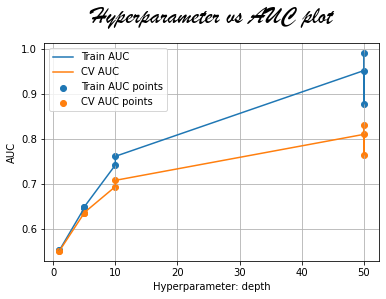

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       3.623920      0.208131         0.115883        0.009120   
7       3.472925      0.403329         0.105448        0.001483   
4      16.100940      1.320308         0.150785        0.025229   
8      16.724431      0.680338         0.122492        0.011680   
9      15.499425      0.114191         0.117385        0.017664   

  param_min_samples_split param_max_depth  \
1                       5               1   
7                     100               1   
4                     500               5   
8                      10               5   
9                       5               5   

                                       params  split0_test_score  \
1    {'min_samples_split': 5, 'max_depth': 1}           0.560746   
7  {'min_samples_split': 100, 'max_depth': 1}           0.560746   
4  {'min_samples_split': 500, 'max_depth': 5}           0.629247   
8   {'min_samples_split': 10, 'max_depth': 5}           0.630138   
9    {'min_samples_split': 5, 'max_depth': 5}           0.630138   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.544883           0.544786         0.550138        0.007501   
7           0.544883           0.544786         0.550138        0.007501   
4           0.640782           0.634529         0.634853        0.004715   
8           0.641871           0.634427         0.635478        0.004848   
9           0.641871           0.634624         0.635544        0.004834   

   rank_test_score  split0_train_score  split1_train_score  \
1                9            0.566499            0.545321   
7                9            0.566499            0.545321   
4                8            0.646001            0.646175   
8                7            0.648564            0.648676   
9                6            0.648564            0.648676   

   split2_train_score  mean_train_score  std_train_score  
1            0.542757          0.551526         0.010639  
7            0.542757          0.551526         0.010639  
4            0.645187          0.645788         0.000431  
8            0.647384          0.648208         0.000584  
9            0.647425          0.648222         0.000565

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()           # Apply Decision Tree

max_depth = [1, 5, 10, 50]                 # Parameters values
min_samples_split = [5, 10, 100, 500]      # Parameters values

parameters = dict(max_depth = max_depth, min_samples_split = min_samples_split)    # Parameters for hyperparameter tuning

clf1 = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 3, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs = -1)

clf1.fit(X_Train_set1, y_train)

results = pd.DataFrame.from_dict(clf1.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
depth =  results['param_max_depth']

plt.plot(depth, train_auc, label = 'Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(depth, train_auc, label = 'Train AUC points')
plt.scatter(depth, cv_auc, label = 'CV AUC points')

plt.legend()
plt.xlabel("Hyperparameter: depth")
plt.ylabel("AUC")
plt.title("Hyperparameter vs AUC plot", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

results.head()

In [38]:
print(clf1.best_estimator_)

DecisionTreeClassifier(max_depth=50, min_samples_split=5)


In [39]:
set1_parameters = clf1.best_params_
print(set1_parameters)

best_depth1 = clf1.best_params_['max_depth']
min_samples_split1 = clf1.best_params_['min_samples_split']

print("Best Depth: ", best_depth1)

{'min_samples_split': 5, 'max_depth': 50}
Best Depth:  50


In [40]:
print(clf1.best_score_)

0.8302066193861025


## 3. Representation of Results

### 3.1 Performance of model using 3d-scatter plot
#### 3.1.1 For `feature set 1`

In [41]:
min_samples_split = clf1.cv_results_['param_min_samples_split']
max_depth = clf1.cv_results_['param_max_depth']
train_auc = clf1.cv_results_['split0_train_score']
test_auc = clf1.cv_results_['split0_test_score']

x = min_samples_split
y = max_depth
z1 = train_auc
z2 = test_auc

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x = x, y = y, z = z1, name = 'train')
trace2 = go.Scatter3d(x = x, y = y, z = z2, name = 'test')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title = 'min_samples_split'),
        yaxis = dict(title = 'max_depth'),
        zaxis = dict(title = 'AUC'),))

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = '3d-scatter-colorscale')
plt.show()

### 3.2 Train Model using the best Hyperparameters

#### 3.2.1 For `feature set 1`

In [42]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0] % 1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0] % 1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

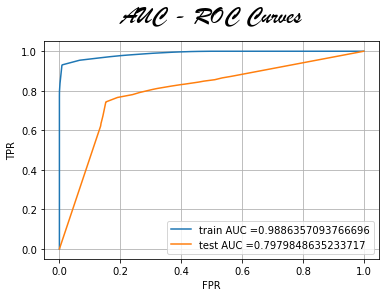

In [43]:
clf_set1 = DecisionTreeClassifier(max_depth = clf1.best_params_['max_depth'], 
                                  min_samples_split = clf1.best_params_['min_samples_split'])
clf_set1.fit(X_Train_set1, y_train)

y_train_pred1 = batch_predict(clf_set1, X_Train_set1)    
y_test_pred1 = batch_predict(clf_set1, X_Test_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)

auc_set1 = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC - ROC Curves", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

### 3.3 Confusion Matrix 
#### 3.3.1 For `feature set 1`

In [44]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr * (1 - fpr))]
    # (tpr*(1 - fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr * (1 - fpr)", max(tpr * (1 - fpr)), "for threshold", np.round(t, 3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [45]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

The maximum value of tpr * (1 - fpr) 0.9222216793545578 for threshold 0.603


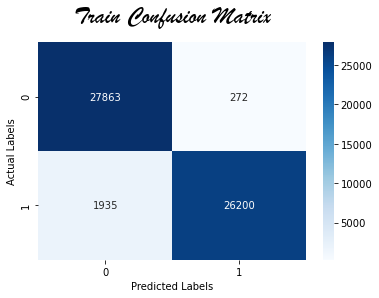

In [46]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Train Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

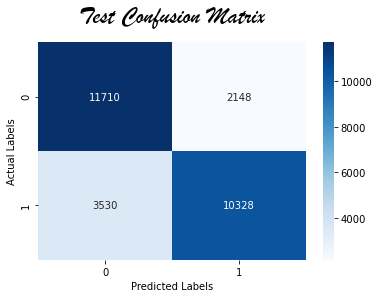

In [47]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Test Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

### 3.3.1 Plot the WordCloud
#### 3.3.1.1 For `feature set 1`

In [48]:
cloud1 = X_test.copy(deep = True)

In [49]:
yTp1 = []

for j in y_test_pred1:
    if j < 0.5:
        yTp1.append(0)
    else:
        yTp1.append(1)
        
cloud1['y_pred'] = yTp1
cloud1['y_test'] = y_test
cloud1.head()

school_state teacher_prefix project_grade_category  \
6819            ar             ms             grades_3_5   
19048           ky             ms             grades_3_5   
19320           ca             ms          grades_prek_2   
24505           tn            mrs             grades_3_5   
22186           pa             ms             grades_3_5   

       teacher_number_of_previously_posted_projects  \
6819                                             27   
19048                                             0   
19320                                            26   
24505                                            30   
22186                                             1   

                clean_categories       clean_subcategories  \
6819                math_science      environmentalscience   
19048  math_science specialneeds  mathematics specialneeds   
19320               math_science               mathematics   
24505              health_sports           health_wellness   
22186               math_science               mathematics   

                                                   essay   price    neg  \
6819   i teach 50 energetic hard working fifth grader...  584.70  0.051   
19048  my students overcomers this i often tell regar...  382.65  0.057   
19320  my class composed 24 energetic lovable curious...  135.16  0.043   
24505  our students wonderful boys girls grades kinde...  118.67  0.038   
22186  our school small k 5 school located northeast ...  129.00  0.017   

         neu    pos  compound  y_pred  y_test  
6819   0.750  0.199    0.9702       1       1  
19048  0.666  0.276    0.9894       0       0  
19320  0.605  0.352    0.9945       0       0  
24505  0.737  0.225    0.9873       1       0  
22186  0.734  0.249    0.9890       1       1

In [50]:
df1 = cloud1[(cloud1['y_pred'] == 1) & (cloud1['y_test'] == 0)]

In [51]:
df1.head()

school_state teacher_prefix project_grade_category  \
24505           tn            mrs             grades_3_5   
16589           mo            mrs          grades_prek_2   
38974           ar            mrs             grades_6_8   
11060           ok            mrs          grades_prek_2   
41848           az             ms             grades_3_5   

       teacher_number_of_previously_posted_projects  \
24505                                            30   
16589                                             0   
38974                                             4   
11060                                            79   
41848                                             0   

                     clean_categories             clean_subcategories  \
24505                   health_sports                 health_wellness   
16589               literacy_language              literature_writing   
38974                    math_science                 appliedsciences   
11060  literacy_language math_science  literature_writing mathematics   
41848                    math_science                     mathematics   

                                                   essay   price    neg  \
24505  our students wonderful boys girls grades kinde...  118.67  0.038   
16589  i teach title 1 school 100 students receive fr...  475.42  0.085   
38974  inquiry based learning i strive get students a...   78.85  0.043   
11060  my students love learn come school every day e...  203.74  0.022   
41848  hello everyone i third grade teacher valle del...  390.16  0.000   

         neu    pos  compound  y_pred  y_test  
24505  0.737  0.225    0.9873       1       0  
16589  0.718  0.197    0.9512       1       0  
38974  0.739  0.218    0.9893       1       0  
11060  0.645  0.333    0.9931       1       0  
41848  0.827  0.173    0.9785       1       0

In [52]:
df1.shape

(2148, 14)

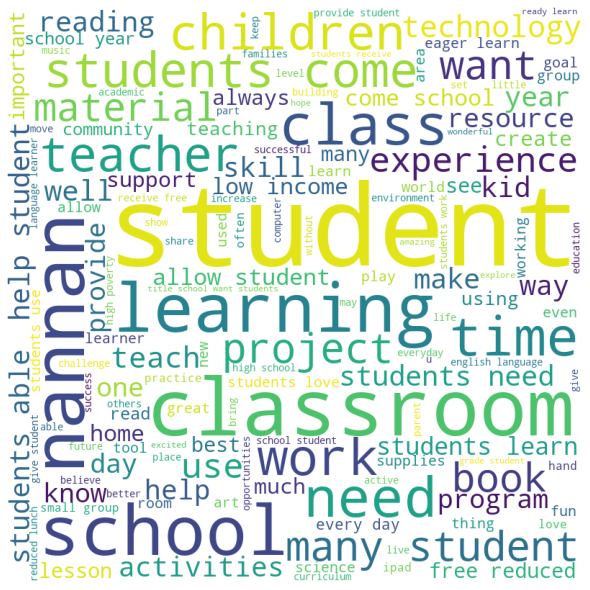

In [53]:
# Reference - https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the essay
for val in df1.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 3.3.2 Plot the Box plot with `price`
#### 3.3.2.1 For `feature set 1`

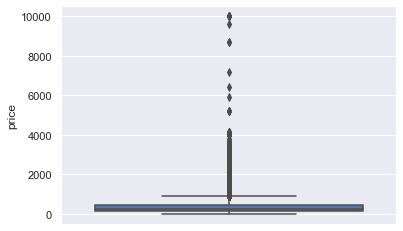

In [54]:
sns.set(style = "darkgrid")
ax = sns.boxplot(y = cloud1["price"])

### 3.3.3 Plot the PDF with `teacher_number_of_previously_posted_projects`
#### 3.3.3.1 For `feature set 1`

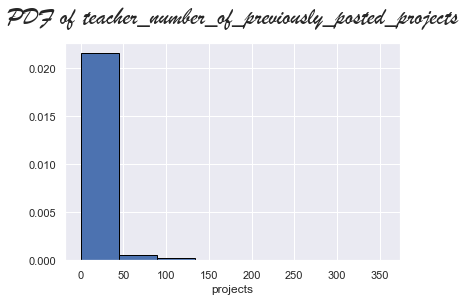

In [55]:
plt.hist(cloud1['teacher_number_of_previously_posted_projects'], bins = 8, edgecolor = 'black', density = True);
plt.title('PDF of teacher_number_of_previously_posted_projects', fontname ="Brush Script MT", fontsize = 25, pad = 20);
plt.xlabel('projects');
plt.plot();

### 2.2 Hyperparameter tuning for `feature set 2` (TFIDF Word2Vec)

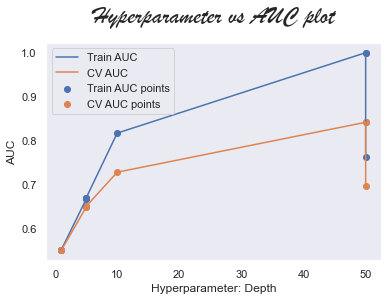

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       5.302665      0.054721         0.134699        0.014266   
9       5.371430      0.345316         0.112056        0.012289   
2      26.677867      1.479514         0.138054        0.015011   
3      26.229050      0.270093         0.124157        0.001453   
6      27.476217      0.057387         0.141652        0.021044   

  param_min_samples_split param_max_depth  \
5                     100               1   
9                       5               1   
2                     500               5   
3                     100               5   
6                       5               5   

                                       params  split0_test_score  \
5  {'min_samples_split': 100, 'max_depth': 1}           0.560746   
9    {'min_samples_split': 5, 'max_depth': 1}           0.560746   
2  {'min_samples_split': 500, 'max_depth': 5}           0.651111   
3  {'min_samples_split': 100, 'max_depth': 5}           0.652653   
6    {'min_samples_split': 5, 'max_depth': 5}           0.652653   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
5           0.544883           0.544786         0.550138        0.007501   
9           0.544883           0.544786         0.550138        0.007501   
2           0.646548           0.647965         0.648542        0.001907   
3           0.647681           0.649205         0.649846        0.002080   
6           0.647681           0.650530         0.650288        0.002037   

   rank_test_score  split0_train_score  split1_train_score  \
5                9            0.566499            0.545321   
9                9            0.566499            0.545321   
2                8            0.673484            0.665740   
3                7            0.676039            0.666914   
6                6            0.676039            0.666914   

   split2_train_score  mean_train_score  std_train_score  
5            0.542757          0.551526         0.010639  
9            0.542757          0.551526         0.010639  
2            0.660041          0.666422         0.005509  
3            0.664033          0.668995         0.005118  
6            0.664955          0.669303         0.004830

In [56]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()           # Apply Decision Tree

max_depth = [1, 5, 10, 50]                 # Parameters values
min_samples_split = [5, 10, 100, 500]      # Parameters values

parameters = dict(max_depth = max_depth, min_samples_split = min_samples_split)    # Parameters for hyperparameter tuning

clf2 = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 3, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs = -1)

clf2.fit(X_Train_set2, y_train)

results = pd.DataFrame.from_dict(clf2.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
depth =  results['param_max_depth']

plt.plot(depth, train_auc, label = 'Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(depth, train_auc, label = 'Train AUC points')
plt.scatter(depth, cv_auc, label = 'CV AUC points')


plt.legend()
plt.xlabel("Hyperparameter: Depth")
plt.ylabel("AUC")
plt.title("Hyperparameter vs AUC plot", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

results.head()

In [57]:
print(clf2.best_estimator_)

DecisionTreeClassifier(max_depth=50, min_samples_split=10)


In [58]:
set2_parameters = clf2.best_params_
print(set2_parameters)

best_depth2 = clf2.best_params_['max_depth']
min_samples_split2 = clf2.best_params_['min_samples_split']

print("Best Depth: ", best_depth2)

{'min_samples_split': 10, 'max_depth': 50}
Best Depth:  50


In [59]:
print(clf2.best_score_)

0.8421384478793557


### 3.1 Performance of model using 3d-scatter plot
#### 3.1.2 For `feature set 2`

In [60]:
min_samples_split = clf2.cv_results_['param_min_samples_split']
max_depth = clf2.cv_results_['param_max_depth']
train_auc = clf2.cv_results_['split0_train_score']
test_auc = clf2.cv_results_['split0_test_score']

x = min_samples_split
y = max_depth
z1 = train_auc
z2 = test_auc

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x = x, y = y, z = z1, name = 'train')
trace2 = go.Scatter3d(x = x, y = y, z = z2, name = 'test')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title = 'min_samples_split'),
        yaxis = dict(title = 'max_depth'),
        zaxis = dict(title = 'AUC'),))

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = '3d-scatter-colorscale')
plt.show()

### 3.2 Train Model using the best Hyperparameters

#### 3.2.2 For `feature set 2`

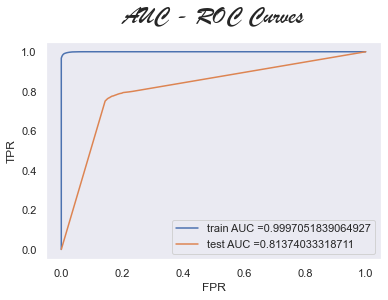

In [61]:
clf_set2 = DecisionTreeClassifier(max_depth = clf2.best_params_['max_depth'], 
                                  min_samples_split = clf2.best_params_['min_samples_split'])
clf_set2.fit(X_Train_set2, y_train)

y_train_pred2 = batch_predict(clf_set2, X_Train_set2)    
y_test_pred2 = batch_predict(clf_set2, X_Test_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred2)

auc_set2 = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC - ROC Curves", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

### 3.3 Confusion Matrix 
#### 3.3.2 For `feature set 2`

In [62]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

The maximum value of tpr * (1 - fpr) 0.9808637093320751 for threshold 0.5


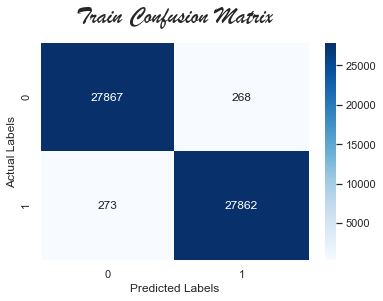

In [63]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Train Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

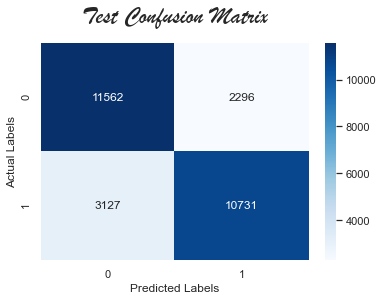

In [64]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Test Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

### 3.3.1 Plot the WordCloud
#### 3.3.1.2 For `feature set 2`

In [65]:
cloud2 = X_test.copy(deep = True)

In [66]:
yTp2 = []

for j in y_test_pred2:
    if j < 0.5:
        yTp2.append(0)
    else:
        yTp2.append(1)
        
cloud2['y_pred'] = yTp2
cloud2['y_test'] = y_test
cloud2.head()

school_state teacher_prefix project_grade_category  \
6819            ar             ms             grades_3_5   
19048           ky             ms             grades_3_5   
19320           ca             ms          grades_prek_2   
24505           tn            mrs             grades_3_5   
22186           pa             ms             grades_3_5   

       teacher_number_of_previously_posted_projects  \
6819                                             27   
19048                                             0   
19320                                            26   
24505                                            30   
22186                                             1   

                clean_categories       clean_subcategories  \
6819                math_science      environmentalscience   
19048  math_science specialneeds  mathematics specialneeds   
19320               math_science               mathematics   
24505              health_sports           health_wellness   
22186               math_science               mathematics   

                                                   essay   price    neg  \
6819   i teach 50 energetic hard working fifth grader...  584.70  0.051   
19048  my students overcomers this i often tell regar...  382.65  0.057   
19320  my class composed 24 energetic lovable curious...  135.16  0.043   
24505  our students wonderful boys girls grades kinde...  118.67  0.038   
22186  our school small k 5 school located northeast ...  129.00  0.017   

         neu    pos  compound  y_pred  y_test  
6819   0.750  0.199    0.9702       1       1  
19048  0.666  0.276    0.9894       0       0  
19320  0.605  0.352    0.9945       0       0  
24505  0.737  0.225    0.9873       0       0  
22186  0.734  0.249    0.9890       1       1

In [67]:
df2 = cloud2[(cloud2['y_pred'] == 1) & (cloud2['y_test'] == 0)]

In [68]:
df2.shape

(2296, 14)

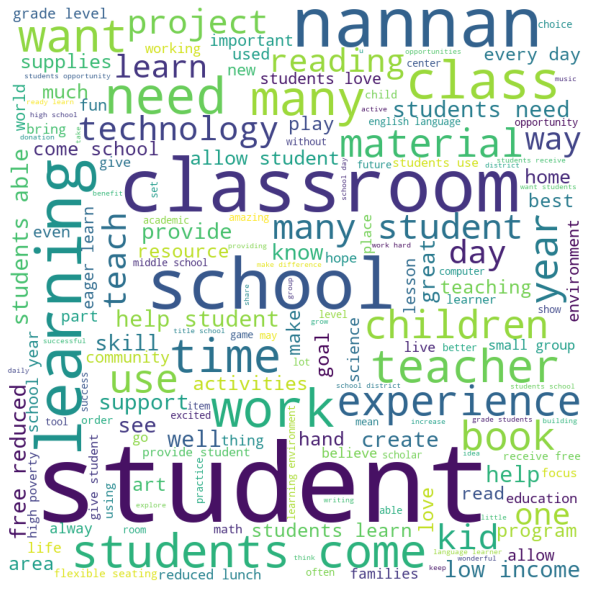

In [69]:
# Reference - https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the essay
for val in df2.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 3.3.2 Plot the Box plot with `price`
#### 3.3.2.2 For `feature set 2`

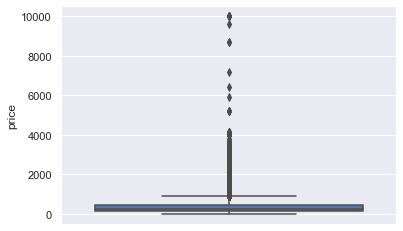

In [70]:
sns.set(style = "darkgrid")
ax = sns.boxplot(y = cloud2["price"])

### 3.3.3 Plot the PDF with `teacher_number_of_previously_posted_projects`
#### 3.3.3.2 For `feature set 2`

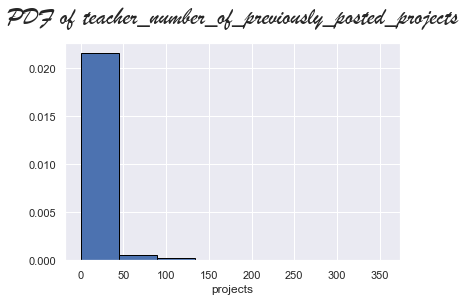

In [71]:
plt.hist(cloud2['teacher_number_of_previously_posted_projects'], bins = 8, edgecolor = 'black', density = True);
plt.title('PDF of teacher_number_of_previously_posted_projects', fontname ="Brush Script MT", fontsize = 25, pad = 20);
plt.xlabel('projects');
plt.plot();

# <font color='green'><b> Task - 2 </b></font>

### Get TOP features using `feature_importances_`

In [72]:
important = []
for j in clf_set1.feature_importances_:
    if j != 0:
        important.append(j)
        
# print(important)
print("Total # of important features:", len(important))

X_train_set1_task2 = X_Train_set1[:, important]
X_test_set1_task2 = X_Test_set1[:, important]

print("# of points in Train Dataset: ", X_train_set1_task2.shape)
print("# of points in Test Dataset: ", X_test_set1_task2.shape)

Total # of important features: 1638
# of points in Train Dataset:  (56270, 1638)
# of points in Test Dataset:  (27716, 1638)


## Applying Decision Tree on the `important features` in  `feature set 1`

### 2.3 Hyperparameter tuning

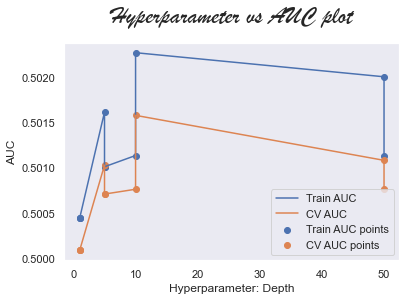

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       0.055186      0.005422         0.029256        0.004485   
8       0.058511      0.005776         0.026926        0.002935   
9       0.048539      0.002348         0.026593        0.002046   
2       0.156581      0.021220         0.046210        0.010752   
4       0.095410      0.031012         0.041224        0.008969   

  param_min_samples_split param_max_depth  \
7                      10               1   
8                     100               1   
9                     500               1   
2                       5               5   
4                     500               5   

                                       params  split0_test_score  \
7   {'min_samples_split': 10, 'max_depth': 1}           0.500320   
8  {'min_samples_split': 100, 'max_depth': 1}           0.500320   
9  {'min_samples_split': 500, 'max_depth': 1}           0.500320   
2    {'min_samples_split': 5, 'max_depth': 5}           0.501012   
4  {'min_samples_split': 500, 'max_depth': 5}           0.500693   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
7           0.500000           0.499947         0.500089        0.000165   
8           0.500000           0.499947         0.500089        0.000165   
9           0.500000           0.499947         0.500089        0.000165   
2           0.501439           0.500640         0.501030        0.000326   
4           0.501226           0.500214         0.500711        0.000413   

   rank_test_score  split0_train_score  split1_train_score  \
7                8            0.500533            0.500080   
8                8            0.500533            0.500080   
9                8            0.500533            0.500080   
2                3            0.501811            0.501305   
4                6            0.500800            0.501092   

   split2_train_score  mean_train_score  std_train_score  
7            0.500720          0.500444         0.000269  
8            0.500720          0.500444         0.000269  
9            0.500720          0.500444         0.000269  
2            0.501732          0.501616         0.000222  
4            0.501146          0.501012         0.000152

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()           # Apply Decision Tree

max_depth = [1, 5, 10, 50]                 # Parameters values
min_samples_split = [5, 10, 100, 500]      # Parameters values

parameters = dict(max_depth = max_depth, min_samples_split = min_samples_split)    # Parameters for hyperparameter tuning

clf3 = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 3, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs = -1)

clf3.fit(X_train_set1_task2, y_train)

results = pd.DataFrame.from_dict(clf3.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
depth =  results['param_max_depth']

plt.plot(depth, train_auc, label = 'Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(depth, train_auc, label = 'Train AUC points')
plt.scatter(depth, cv_auc, label = 'CV AUC points')


plt.legend()
plt.xlabel("Hyperparameter: Depth")
plt.ylabel("AUC")
plt.title("Hyperparameter vs AUC plot", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

results.head()

In [74]:
print(clf3.best_params_)

{'min_samples_split': 5, 'max_depth': 10}


In [75]:
task2_set1_parameters = clf3.best_params_
print(task2_set1_parameters)

best_depth3 = clf3.best_params_['max_depth']
min_samples_split3 = clf3.best_params_['min_samples_split']

print("Best Depth: ", best_depth3)

{'min_samples_split': 5, 'max_depth': 10}
Best Depth:  10


In [76]:
print(clf3.best_score_)

0.5015802967694829


### 3.1 Performance of model using 3d-scatter plot
#### 3.1.3 For `important features` in `feature set 1`

In [77]:
min_samples_split = clf3.cv_results_['param_min_samples_split']
max_depth = clf3.cv_results_['param_max_depth']
train_auc = clf3.cv_results_['split0_train_score']
test_auc = clf3.cv_results_['split0_test_score']

x = min_samples_split
y = max_depth
z1 = train_auc
z2 = test_auc

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x = x, y = y, z = z1, name = 'train')
trace2 = go.Scatter3d(x = x, y = y, z = z2, name = 'test')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title = 'min_samples_split'),
        yaxis = dict(title = 'max_depth'),
        zaxis = dict(title = 'AUC'),))

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = '3d-scatter-colorscale')
plt.show()

### 3.2 Train Model using the best Hyperparameters

#### 3.2.3 For `important features` in `feature set 1`

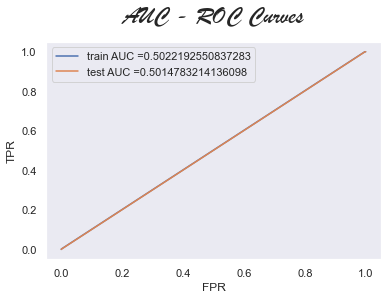

In [78]:
clf_task2_set1 = DecisionTreeClassifier(max_depth = clf3.best_params_['max_depth'], 
                                  min_samples_split = clf3.best_params_['min_samples_split'])
clf_task2_set1.fit(X_train_set1_task2, y_train)

y_train_pred3 = batch_predict(clf_task2_set1, X_train_set1_task2)    
y_test_pred3 = batch_predict(clf_task2_set1, X_test_set1_task2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred3)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred3)

auc_set3 = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC - ROC Curves", fontname ="Brush Script MT", fontsize = 25, pad = 20)
plt.grid()
plt.show()

### 3.3 Confusion Matrix 
#### 3.3.3 For `important features` in `feature set 1`

In [79]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

The maximum value of tpr * (1 - fpr) 0.003055713160881875 for threshold 0.5


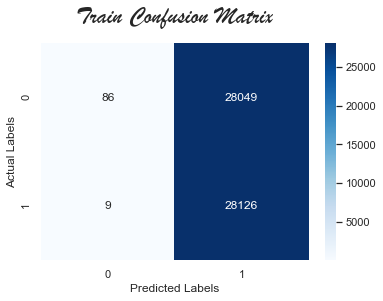

In [80]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred3, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Train Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

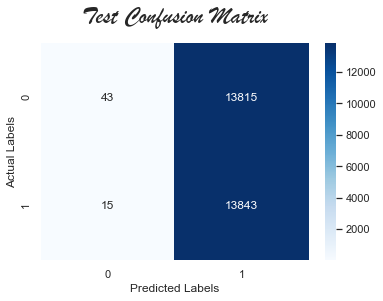

In [81]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred3, best_t)), annot = True, ax = ax, fmt = 'd', 
            cmap = "Blues")

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('Actual Labels');
ax.set_title('Test Confusion Matrix', fontname ="Brush Script MT", fontsize = 25, pad = 20);

### 3.3.1 Plot the WordCloud
#### 3.3.1.3 For `important features` in `feature set 1`

In [82]:
cloud3 = X_test.copy(deep = True)

In [83]:
yTp3 = []

for j in y_test_pred3:
    if j < 0.5:
        yTp3.append(0)
    else:
        yTp3.append(1)
        
cloud3['y_pred'] = yTp3
cloud3['y_test'] = y_test
cloud3.head()

school_state teacher_prefix project_grade_category  \
6819            ar             ms             grades_3_5   
19048           ky             ms             grades_3_5   
19320           ca             ms          grades_prek_2   
24505           tn            mrs             grades_3_5   
22186           pa             ms             grades_3_5   

       teacher_number_of_previously_posted_projects  \
6819                                             27   
19048                                             0   
19320                                            26   
24505                                            30   
22186                                             1   

                clean_categories       clean_subcategories  \
6819                math_science      environmentalscience   
19048  math_science specialneeds  mathematics specialneeds   
19320               math_science               mathematics   
24505              health_sports           health_wellness   
22186               math_science               mathematics   

                                                   essay   price    neg  \
6819   i teach 50 energetic hard working fifth grader...  584.70  0.051   
19048  my students overcomers this i often tell regar...  382.65  0.057   
19320  my class composed 24 energetic lovable curious...  135.16  0.043   
24505  our students wonderful boys girls grades kinde...  118.67  0.038   
22186  our school small k 5 school located northeast ...  129.00  0.017   

         neu    pos  compound  y_pred  y_test  
6819   0.750  0.199    0.9702       1       1  
19048  0.666  0.276    0.9894       1       0  
19320  0.605  0.352    0.9945       1       0  
24505  0.737  0.225    0.9873       1       0  
22186  0.734  0.249    0.9890       1       1

In [84]:
df3 = cloud3[(cloud3['y_pred'] == 1) & (cloud3['y_test'] == 0)]

In [85]:
df3.shape

(13824, 14)

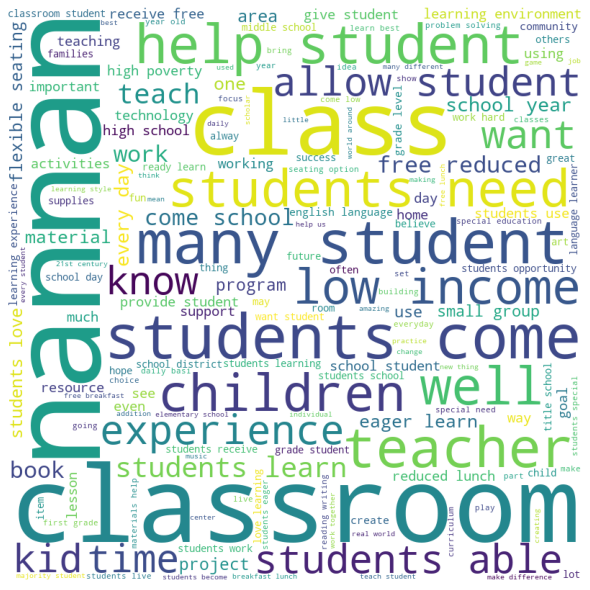

In [86]:
# Reference - https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the essay
for val in df3.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 3.3.2 Plot the Box plot with `price`
#### 3.3.2.3 For `important features` in `feature set 1`

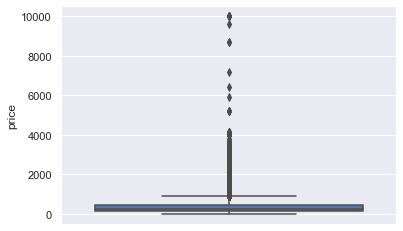

In [87]:
sns.set(style = "darkgrid")
ax = sns.boxplot(y = cloud3["price"])

### 3.3.3 Plot the PDF with `teacher_number_of_previously_posted_projects`
#### 3.3.3.3 For `important features` in `feature set 1`

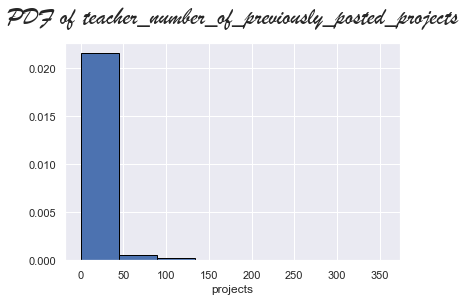

In [88]:
plt.hist(cloud3['teacher_number_of_previously_posted_projects'], bins = 8, edgecolor = 'black', density = True);
plt.title('PDF of teacher_number_of_previously_posted_projects', fontname ="Brush Script MT", fontsize = 25, pad = 20);
plt.xlabel('projects');
plt.plot();

## 4. Summary

In [89]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparameters", "AUC"]
x.add_row(["TFIDF", "Decision Trees", set1_parameters, auc_set1])
x.add_row(["TFIDF Word2Vec", "Decision Trees", set2_parameters, auc_set2])
x.add_row(["Important features TFIDF", "Decision Trees", task2_set1_parameters, auc_set3])

print(x)

+--------------------------+----------------+--------------------------------------------+--------------------+
|        Vectorizer        |     Model      |              Hyperparameters               |        AUC         |
+--------------------------+----------------+--------------------------------------------+--------------------+
|          TFIDF           | Decision Trees | {'min_samples_split': 5, 'max_depth': 50}  | 0.7979848635233717 |
|      TFIDF Word2Vec      | Decision Trees | {'min_samples_split': 10, 'max_depth': 50} |  0.81374033318711  |
| Important features TFIDF | Decision Trees | {'min_samples_split': 5, 'max_depth': 10}  | 0.5014783214136098 |
+--------------------------+----------------+--------------------------------------------+--------------------+
